# Restarted, this model is only for Rainfall Prediction

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv("data/cleaned_data.csv")
df

,Unnamed: 0,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall,ExtremeRainfall
0,0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0,1,False
1,1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0,1,False
2,2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0,1,False
3,3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0,1,False
4,4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6231,6231,2023,1,30,34.0,19.0,26.50,4.0,63.0,0.0,1,False
6232,6232,2023,1,31,37.0,19.0,28.00,2.9,57.5,0.0,0,False
6233,6233,2023,2,1,34.0,20.0,27.00,2.3,55.0,0.0,0,False
6234,6234,2023,2,2,38.0,19.0,28.50,2.4,54.0,0.0,0,False


In [106]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['ExtremeRainfall'], axis=1, inplace=True)

In [107]:
df = df[df['Year'] < 2023]
df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall
0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0,1
1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0,1
2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0,1
3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0,1
4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...
6197,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0,1
6198,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0,1
6199,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0,1
6200,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0,1


In [108]:
df.isna().sum()

Year             0
Month            0
Day              0
MaxT             0
MinT             0
AvgT             0
WindSpeed        0
Humidity         0
Precipitation    0
Rainfall         0
dtype: int64

# Data Info
Maximum Temperature(°C)<br>
Minimum Temperature(°C)<br>
Humidity(%)<br>
Precipitation(mm)<br>

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6202 entries, 0 to 6201
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           6202 non-null   int64  
 1   Month          6202 non-null   int64  
 2   Day            6202 non-null   int64  
 3   MaxT           6202 non-null   float64
 4   MinT           6202 non-null   float64
 5   AvgT           6202 non-null   float64
 6   WindSpeed      6202 non-null   float64
 7   Humidity       6202 non-null   float64
 8   Precipitation  6202 non-null   float64
 9   Rainfall       6202 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 533.0 KB


In [110]:
df.describe()

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall
count,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000
mean,2014.009029,6.529345,15.742341,33.345630,24.773783,29.059707,2.825314,67.155160,3.445292,0.768946
std,4.894492,3.445878,8.796452,3.273129,3.085633,2.907412,1.060653,11.332994,8.288860,0.421541
min,2006.000000,1.000000,1.000000,21.900000,14.400000,20.550000,0.500000,30.500000,0.000000,0.000000
25%,2010.000000,4.000000,8.000000,30.900000,22.500000,26.850000,2.100000,59.500000,0.000000,1.000000
50%,2014.000000,7.000000,16.000000,33.000000,25.400000,29.050000,2.500000,68.300000,0.000000,1.000000
75%,2018.000000,10.000000,23.000000,35.300000,27.000000,31.000000,3.400000,75.675000,2.600000,1.000000
max,2022.000000,12.000000,31.000000,48.000000,33.000000,39.500000,7.900000,95.100000,128.300000,1.000000


# Data Visualization and Correlation

<Axes: >

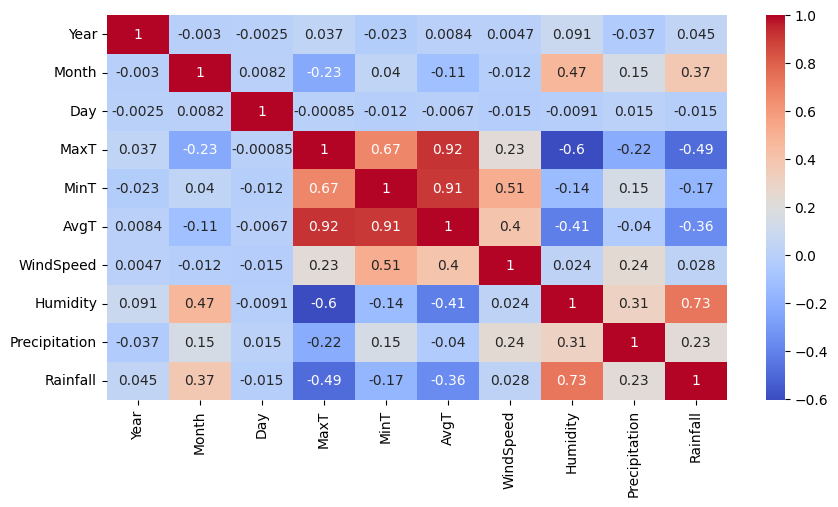

In [111]:
# A correlation heat map for each pair of explanatory variables.
plt.figure(figsize=(10, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'MaxT'}>,
        <Axes: title={'center': 'MinT'}>,
        <Axes: title={'center': 'AvgT'}>],
       [<Axes: title={'center': 'WindSpeed'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Precipitation'}>],
       [<Axes: title={'center': 'Rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

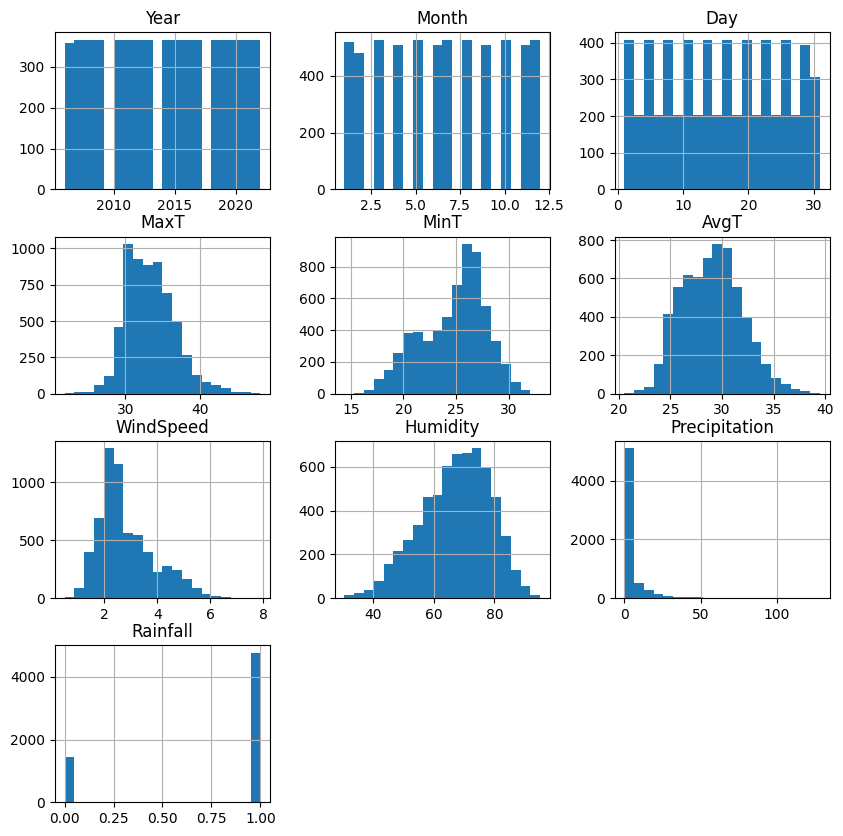

In [112]:
# Histograms for each feature
df.hist(figsize=(10, 10), bins=20)

# Train and Test split

In [113]:
from sklearn.model_selection import train_test_split

X = df.drop(['Rainfall'], axis=1)
y = df['Rainfall']

trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2, random_state=42)

In [114]:
trainX

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation
286,2006,10,21,33.6,24.5,29.05,1.3,70.8,0.0
1820,2011,1,2,29.3,20.7,25.00,2.2,68.8,0.0
307,2006,11,11,30.7,23.0,26.85,2.1,76.8,0.0
4384,2018,1,9,28.8,19.0,23.90,2.2,69.7,0.0
4823,2019,3,24,35.6,26.2,30.90,2.5,56.0,0.0
...,...,...,...,...,...,...,...,...,...
3772,2016,5,7,37.1,26.5,31.80,3.1,56.8,0.0
5191,2020,3,26,35.6,25.3,30.45,2.5,67.3,0.0
5226,2020,4,30,36.0,26.4,31.20,2.3,64.8,0.0
5390,2020,10,11,28.4,25.0,26.70,2.0,87.8,110.5


In [115]:
testX

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation
5369,2020,9,20,31.0,26.3,28.65,2.9,87.3,36.0
2463,2012,10,6,34.2,26.2,30.20,2.0,73.0,0.0
2505,2012,11,17,31.1,18.5,24.80,1.9,60.2,0.0
5419,2020,11,9,31.3,20.9,26.10,1.9,60.0,0.0
1315,2009,8,15,31.3,26.4,28.85,2.9,83.3,9.2
...,...,...,...,...,...,...,...,...,...
3647,2016,1,3,31.1,20.3,25.70,1.5,60.7,0.0
2346,2012,6,11,37.7,29.3,33.50,5.4,46.8,5.2
3751,2016,4,16,36.9,28.6,32.75,2.9,46.0,0.0
724,2008,1,2,29.2,18.7,23.95,1.6,67.5,0.0


In [116]:
trainY

286     1
1820    1
307     1
4384    1
4823    0
       ..
3772    0
5191    1
5226    1
5390    1
860     0
Name: Rainfall, Length: 4961, dtype: int64

In [117]:
testY

5369    1
2463    1
2505    1
5419    0
1315    1
       ..
3647    1
2346    1
3751    0
724     1
765     1
Name: Rainfall, Length: 1241, dtype: int64

## Building a basic model using Logistic Regression

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the training and testing data
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

#Reinitialize and fit the Logistic Regression model on scaled data
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(trainX_scaled, trainY)

LogisticRegression(max_iter=1000)

In [121]:
# Use scaled tes data for prediction
lg_pred = lg_model.predict(testX_scaled)

In [122]:
from sklearn.metrics import mean_squared_error
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse_lg = mean_squared_error(testY, lg_pred)
# Print the MSE and R-squared value
print(f"Mean Squared Error for Logistic Regression: {mse_lg}")

Mean Squared Error for Logistic Regression: 0.016116035455278


## R2_Score 
Initially I was using r2_score which apparently is not an accurate measure for logistic regression so I just used a normal accuracy score.

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(testY, lg_pred)
conf_matrix = confusion_matrix(testY, lg_pred)
report = classification_report(testY, lg_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.983883964544722
Confusion Matrix:
[[273  14]
 [  6 948]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       287
           1       0.99      0.99      0.99       954

    accuracy                           0.98      1241
   macro avg       0.98      0.97      0.98      1241
weighted avg       0.98      0.98      0.98      1241



In [124]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(trainX_scaled, trainY)
dt_pred = dt_model.predict(testX_scaled)

In [125]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse_dt = mean_squared_error(testY, dt_pred)
# Print the MSE and R-squared value
print(f"Mean Squared Error for Decision Tree: {mse_dt}")

Mean Squared Error for Decision Tree: 0.0


In [126]:
accuracy = accuracy_score(testY, dt_pred)
conf_matrix = confusion_matrix(testY, dt_pred)
report = classification_report(testY, dt_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[287   0]
 [  0 954]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       954

    accuracy                           1.00      1241
   macro avg       1.00      1.00      1.00      1241
weighted avg       1.00      1.00      1.00      1241

